In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [2]:
dataset = pd.read_csv("Griewank_dataset_data.csv")
Griewank_dataset = dataset["val"].tolist()

In [3]:
D = 50
f_bias = -180
lower_bound = -600
upper_bound = 600

In [5]:
def func(x):
    F1 = 0
    F2 = 1
    for i in range(D - 1):
        z = x[i] - Griewank_dataset[i]
        F1 += z ** 2 / 4000
        F2 += math.cos(z / math.sqrt(i + 1))
    func = F1 - F2 + 1 + f_bias
    return func

In [6]:
class GW:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = xmin
        self.upper_bound = xmax
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [7]:
def compute(func):
    global curve
    global start_time
    global end_time
    gen=150
    start_time = time.time()
    algo = pg.algorithm(pg.de(gen=gen,F=0.6,CR=0.95,variant=3,ftol=0,xtol=1e-5))
    algo.set_verbosity(100)
    popsize = 100
    prob = pg.problem(GW(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.de)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    niter = pop.problem.get_fevals()
    
    curve = [x[2] for x in log]
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [8]:
compute(func)

Best position:  [ 539.60138479 -327.77283351  138.72483012    4.33816716  469.6687814
  315.28076608  -79.72995536 -511.34847635  386.85009187  -80.17952736
  105.90755407  373.45867599  528.26701745  239.00819637 -381.30512722
 -109.42801433  490.68218201  504.85550216 -105.2186658   506.95156883
 -502.09751204 -179.60778708  351.17218815 -560.83002177 -432.4536162
 -324.09381312 -295.903031    122.65911071 -287.83747009 -362.05763114
 -579.97249699  324.55757281  -74.79033939  445.80405172  -43.11698522
  -65.36208079  405.62631154   35.72816481 -393.81043467  185.71549146
  436.90443515 -525.99176075  214.69274471 -224.36991426  411.18242368
   16.655042    214.13723687  -34.98623376 -172.88297111  307.42324428]
Best Fitness -187.44481306161288


In [9]:
comp_time = end_time-start_time
comp_time

1.451462745666504

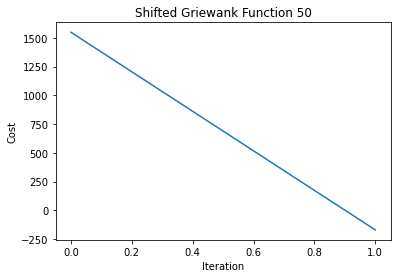

In [10]:
plt.plot(curve)
plt.title("Shifted Griewank Function 50")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()